# Exercise 2

Work on this before the next lecture on 24 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2017/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

## Question 1

Correlation between trees. This question is about investigating the correlation between decision trees and how this effects an ensemble constructed from them. There are three methods
for adding randomisation to the tree growing process:

1. grow each tree on a bootstrap sample
2. for each tree select a subset of features at random
3. pick the best random split point

You can use `RandomForestClassifier`, `BaggingClassifier`, and `ExtraTreesClassifier` to achieve various different sets of the above three strategies.

Show how the average amount of correlation between the trees in the ensemble varies as a function of bootstrap yes/no, number of `max_features`, and picking the best split point at random or not.

Pick one of the classification datasets from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets.

In [65]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

iris = load_iris()
digits = load_digits()

In [4]:
#help(load_digits)

#### iris dataset

In [5]:
#print(iris.target.shape)
#print(iris.data.shape)
#X = iris.data
#y = iris.target
#print(help(plt.imshow))

#### digits dataset

In [6]:
X = digits.data
y = digits.target
#im = X[0,:].reshape((8,8))
#plt.matshow(im, cmap='Greys')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.8,random_state=42)

# Summary of results

Here is a table summarizing a measure of correlation observed using:
- different models;
- different definitions of the error;
- different definitions of correlation.

In case of BaggingClassifier and ExtraTrees, where I tested multiple hyperparameter values, I am reporting only the ones with the _largest observed score_.

### Correlation in the predictions

|| Random Forest $\pm$ std. dev.| Bagging Classifier $\pm$ std. dev.| Extra Trees $\pm$ std. dev.|
|------|:----:|:----:|:----:|
| error as average  | 0.1935 $\pm$ 0.0045| 0.1948 $\pm$ 0.0064| 0.2051 $\pm$ 0.0031|
| error as max      | 0.5670 $\pm$ 0.0218| 0.6060 $\pm$ 0.0252| 0.5798 $\pm$ 0.0184|
| error as L2 norm  | 20.98  $\pm$ 0.4254| 21.19  $\pm$ 0.5836| 42.71  $\pm$ 0.6062|


### Correlation in the errors

|| Random Forest $\pm$ std. dev.| Bagging Classifier $\pm$ std. dev.| Extra Trees $\pm$ std. dev.|
|------|:----:|:----:|:----:|
| error as average  | 0.0915 $\pm$ 0.0026| 0.0955 $\pm$ 0.0030| 0.0876 $\pm$ 0.0017|
| error as max      | 0.3616 $\pm$ 0.0209| 0.4032 $\pm$ 0.0272| 0.3256 $\pm$ 0.0138|
| error as L2 norm  | 11.87  $\pm$ 0.2094| 12.28  $\pm$ 0.2427| 20.61  $\pm$ 0.2841|

## Discussion

### Measures of Correlation

First of all, it should be noted that it does not make sense to compare values of different error measures. Also, I'm not even sure whether it makes sense to compare the value of the same error measure but using a different definition of correlation. If this latter comparison made sense, we can remark that using correlation in the errors leads us to believe that the there is less correlation for every use case considered, compared to using the definition of correlation in the predictions.

Anyway, the discussion that makes the most sense, in my opinion, is to compare different ensemble models using the _same error and correlation measures_.
In this case, we can conclude that:
- the correlations in the Random Forest and Bagging Classifier tend to be always similar;
- the correlations in the Extra Trees, when using definition of the error as the average, tend to be similar to the other models;
- the correlations in the Extra Trees, when using definition of the error as the L2 norm, tend to be much larger than the other models;
- the above two remarks lead me to think that Extra Trees tend to have roughly the same amount of correlation _on average_ as other models; however, their correlation values are _much more spread out_ than other models, in the sense that in Extra Trees it is more likely to find a pair of very highly correlated trees and a pair of absolutely uncorrelated trees, than it is in other models.
- when considering the maximum observed correlation, the situation is not so clear: extra trees tend to be slightly less correlated in their predictions than the other ensemble models, but there is too much variability in the correlations of errors to draw any conclusion.

### Interpretation

Measuring correlations in the **predictions** is an idea presented in [this Github issue](https://github.com/wildtreetech/advanced-comp-2017/issues/8).
I believe that in this case, correlation can be a proxy concept for _robustness_ or _generalizbility_, in the sense that an ensemble with a low correlation is probably better at generalizing and very likely less sensitive to small changes in the data.
Moreover, and perhaps more importantly, the primary assumption behind ensemble methods is that, by averaging **independent** and **unbiased** weak classifiers, one can obtain a low-variance method. In this sense, correlation in the predictions can be a measure of how _independent_ the individual weak classifiers actually are.

Measuring correlations in the errors is an idea presented in [this Quora answer](https://www.quora.com/How-do-I-compute-the-correlation-between-trees-in-the-random-forest) and comments.
In this sense, I believe correlation can be an important metric for assessing the level of certainty for a given prediction. Indeed, if we knew the probability of observing a given correlation value given that the ensemble made a mistake, and we made assumptions on the prior probabilities of observing that correlation and of making an error, we could use Bayes' theorem to compute, for a given prediction, the probability of making an error given a certain observed correlation.

### Scores

In the end, it is important to also make note of the final validation scores for each model.

The best score across all tests I made was obtained using the Extra Trees classifier (95.06%) requiring minimum 2 samples for a split. The basic Random Forest model  scored 92.78% followed closely by the Bagging Classifier using 37% of the features, which scored 92.44%. 
Somewhat surprisingly, although this was anticipated in the lecture, the completely random Extra Trees classifier appears to have the best accuracy.
Interestingly, removing bootstrap in the Random Forest classifier yields a small increase in accuracy for this dataset up to 93.33%. However, as expected, this also yields an increase in correlation among predictions, which is an undesirable property.


### Definition of correlation
Following our discussion on [github issues](https://github.com/wildtreetech/advanced-comp-2017/issues/8) I decided to define the error as:
> error = average value of the entries of $C - I$

where:
- the correlation matrix $C \in \mathbb{R}^{N\times N}$ is defined based on the [Pearson product-moment correlation coefficients](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html), where we measure the **correlation in the predictions**;
- $I$ is the identity matrix, included to account for the fact that the correlation of any variable with itself is 1.0, and such quantities could potentially skew the computation of the average

In [19]:
def get_prediction_correlation_matrix(forest, y_val):
    errors = np.zeros(shape=(len(forest.estimators_), y_val.shape[0]))
    for idx,tree in enumerate(forest.estimators_):
        y_pred = tree.predict(X_val)
        #errors[idx,:] = ( y_pred == y_val )
        errors[idx,:] = y_pred
        
    C = np.corrcoef(errors)
    return C

In [20]:
def get_prediction_correlation_matrix_with_bagging(forest, y_val):
    errors = np.zeros(shape=(len(forest.estimators_), y_val.shape[0]))
    for idx,tree in enumerate(forest.estimators_):
        y_pred = tree.predict( X_val[:,forest.estimators_features_[idx]] )
        #errors[idx,:] = ( y_pred == y_val )
        errors[idx,:] = y_pred
        
    C = np.corrcoef(errors)
    return C

In [21]:
def error_as_average(C):
    N = C.shape[0]
    return np.mean( np.triu( C - np.diag(np.ones(N)) ) )

In [33]:
def error_as_max(C):
    N = C.shape[0]
    return np.abs( np.triu( C - np.diag(np.ones(N)) ) ).max()

In [27]:
def error_as_L2(C):
    N = C.shape[0]
    return np.linalg.norm( C )

In [192]:
def evaluate_classifier(clf,X_train,y_train,X_val, y_val):
    errors_avg = []
    errors_max = []
    errors_l2 = []
    scores = []
    for iter in range(100):
        clf.random_state = 42 + 3*iter
        clf.fit(X_train,y_train)
        C = get_prediction_correlation_matrix(clf, y_val)
        errors_avg.append(error_as_average(C))
        errors_max.append(error_as_max(C))
        errors_l2.append(error_as_L2(C))
        scores.append(forest.score(X_val, y_val))
    errors_avg = np.array(errors_avg)
    errors_max = np.array(errors_max)
    errors_l2 = np.array(errors_l2)
    scores = np.array(scores)
    return errors_avg,errors_max,errors_l2,scores

In [193]:
def evaluate_classifier_with_bagging(clf,X_train,y_train,X_val, y_val):
    errors_avg = []
    errors_max = []
    errors_l2 = []
    scores = []
    for iter in range(100):
        clf.random_state = 42 + 3*iter
        clf.fit(X_train,y_train)
        C = get_prediction_correlation_matrix_with_bagging(clf, y_val)
        errors_avg.append(error_as_average(C))
        errors_max.append(error_as_max(C))
        errors_l2.append(error_as_L2(C))
        scores.append(forest.score(X_val, y_val))
    errors_avg = np.array(errors_avg)
    errors_max = np.array(errors_max)
    errors_l2 = np.array(errors_l2)
    scores = np.array(scores)
    return errors_avg,errors_max,errors_l2,scores

## Estimating correlation between trees
#### RandomForestClassifier
with the following setup:
- bootstrap YES
- ALL features
- FIXED split point

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

forest = RandomForestClassifier(n_estimators=50)
errors_avg,errors_max,errors_l2,scores = evaluate_classifier( forest,X_train,y_train,X_val, y_val )

print('avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
print('max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
print('L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')

avg -- 0.19352024455 -- 0.00454073365013 -- 0.92780945758
max -- 0.567032633127 -- 0.0217816732227 -- 0.92780945758
L2 -- 20.9812668444 -- 0.42539342404 -- 0.92780945758


## Estimating correlation between trees
#### RandomForestClassifier - NO bootstrap
with the following setup:
- bootstrap NO
- ALL features
- FIXED split point

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

forest = RandomForestClassifier(n_estimators=50, bootstrap=False)
errors_avg,errors_max,errors_l2,scores = evaluate_classifier( forest,X_train,y_train,X_val, y_val )

print('avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
print('max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
print('L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')

avg -- 0.231880602196 -- 0.00377052410673 -- 0.933379694019
max -- 0.619031235918 -- 0.0206431355585 -- 0.933379694019
L2 -- 24.5773889956 -- 0.359244381102 -- 0.933379694019


## Estimating correlation between trees
#### BaggingClassifier
with the following setup:
- bootstrap NO
- SUBSET of features
- FIXED split point

In [45]:
from sklearn.ensemble import BaggingClassifier

errors_means_avg = []
errors_means_max = []
errors_means_l2 = []
score_means = []

#feats_percents = np.logspace(start=-12.0,stop=0.0, num=6, base=1.25)
feats_percents = [0.1, 0.17, 0.25, 0.37, 0.50, 0.75]

for feat in feats_percents:
    forest = BaggingClassifier(max_features=feat, n_estimators=50)
    errors_avg,errors_max,errors_l2,scores = evaluate_classifier_with_bagging( forest,X_train,y_train,X_val, y_val )

    print(feat,'avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
    print(feat,'max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
    print(feat,'L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')
    errors_means_avg.append(np.mean(errors_avg))
    errors_means_max.append(np.mean(errors_max))
    errors_means_l2.append(np.mean(errors_l2))
    score_means.append(np.mean(scores))

0.1 -- avg -- 0.0524309043886 -- 0.00571100956724 -- 0.875639777469
0.1 -- max -- 0.385651750951 -- 0.0433989861491 -- 0.875639777469
0.1 -- L2 -- 9.45795591628 -- 0.395503243183 -- 0.875639777469
0.17 -- avg -- 0.104373029261 -- 0.0059256700434 -- 0.913031988873
0.17 -- max -- 0.482268248494 -- 0.0329968493686 -- 0.913031988873
0.17 -- L2 -- 13.2807959805 -- 0.505358229018 -- 0.913031988873
0.25 -- avg -- 0.159163927335 -- 0.00657093344025 -- 0.923845618915
0.25 -- max -- 0.554460188664 -- 0.0254769046225 -- 0.923845618915
0.25 -- L2 -- 17.9567638917 -- 0.586582552217 -- 0.923845618915
0.37 -- avg -- 0.194834143591 -- 0.00635804851546 -- 0.924401947149
0.37 -- max -- 0.605952406427 -- 0.0252251077837 -- 0.924401947149
0.37 -- L2 -- 21.1922520082 -- 0.58359147248 -- 0.924401947149
0.5 -- avg -- 0.224034930129 -- 0.0060013169755 -- 0.917503477051
0.5 -- max -- 0.645432139551 -- 0.0245773686413 -- 0.917503477051
0.5 -- L2 -- 23.906918444 -- 0.56139664529 -- 0.917503477051
0.75 -- avg -- 

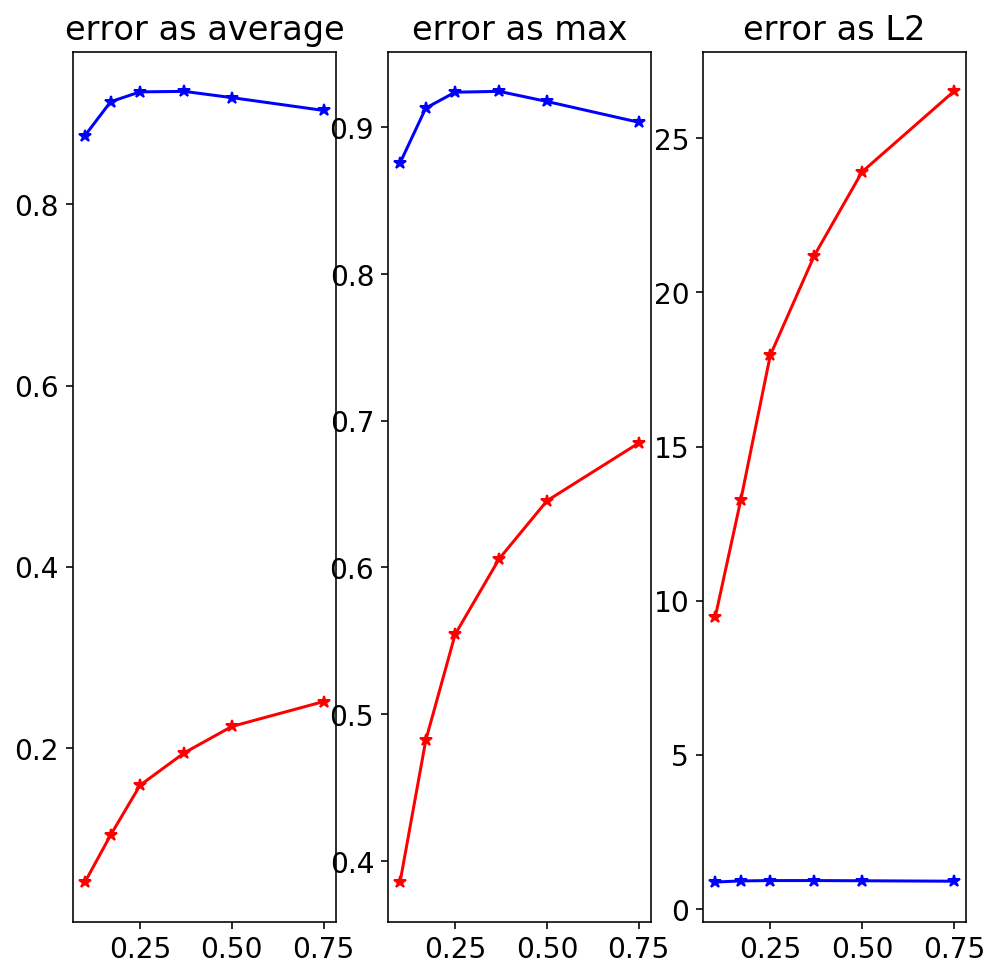

In [46]:
ax = plt.subplot(131)
plt.plot(feats_percents, errors_means_avg, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as average')
ax = plt.subplot(132)
plt.plot(feats_percents, errors_means_max, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as max')
ax = plt.subplot(133)
plt.plot(feats_percents, errors_means_l2, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as L2')

## Estimating correlation between trees
#### ExtraTreesClassifier
with the following setup:
- bootstrap NO
- ALL of features
- RANDOM split points

In [194]:
from sklearn.ensemble import ExtraTreesClassifier

errors_means_avg = []
errors_means_max = []
errors_means_l2 = []
score_means = []

splits = [2,4,6]
for split in splits:
    forest = ExtraTreesClassifier(min_samples_split=split, n_estimators=100)
    errors_avg,errors_max,errors_l2,scores = evaluate_classifier( forest,X_train,y_train,X_val, y_val )

    print(split,'avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
    print(split,'max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
    print(split,'L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')
    errors_means_avg.append(np.mean(errors_avg))
    errors_means_max.append(np.mean(errors_max))
    errors_means_l2.append(np.mean(errors_l2))
    score_means.append(np.mean(scores))

2 -- avg -- 0.205115724819 -- 0.00310692960367 -- 0.950625869263
2 -- max -- 0.579777751157 -- 0.0183951651764 -- 0.950625869263
2 -- L2 -- 42.7079165931 -- 0.606185960147 -- 0.950625869263
4 -- avg -- 0.195371173848 -- 0.00328433632865 -- 0.948407510431
4 -- max -- 0.566968406821 -- 0.01725039208 -- 0.948407510431
4 -- L2 -- 40.839660567 -- 0.636187134395 -- 0.948407510431
6 -- avg -- 0.190965826135 -- 0.00366413274277 -- 0.945125173853
6 -- max -- 0.56894274759 -- 0.0199408427046 -- 0.945125173853
6 -- L2 -- 40.0182809195 -- 0.694496321669 -- 0.945125173853


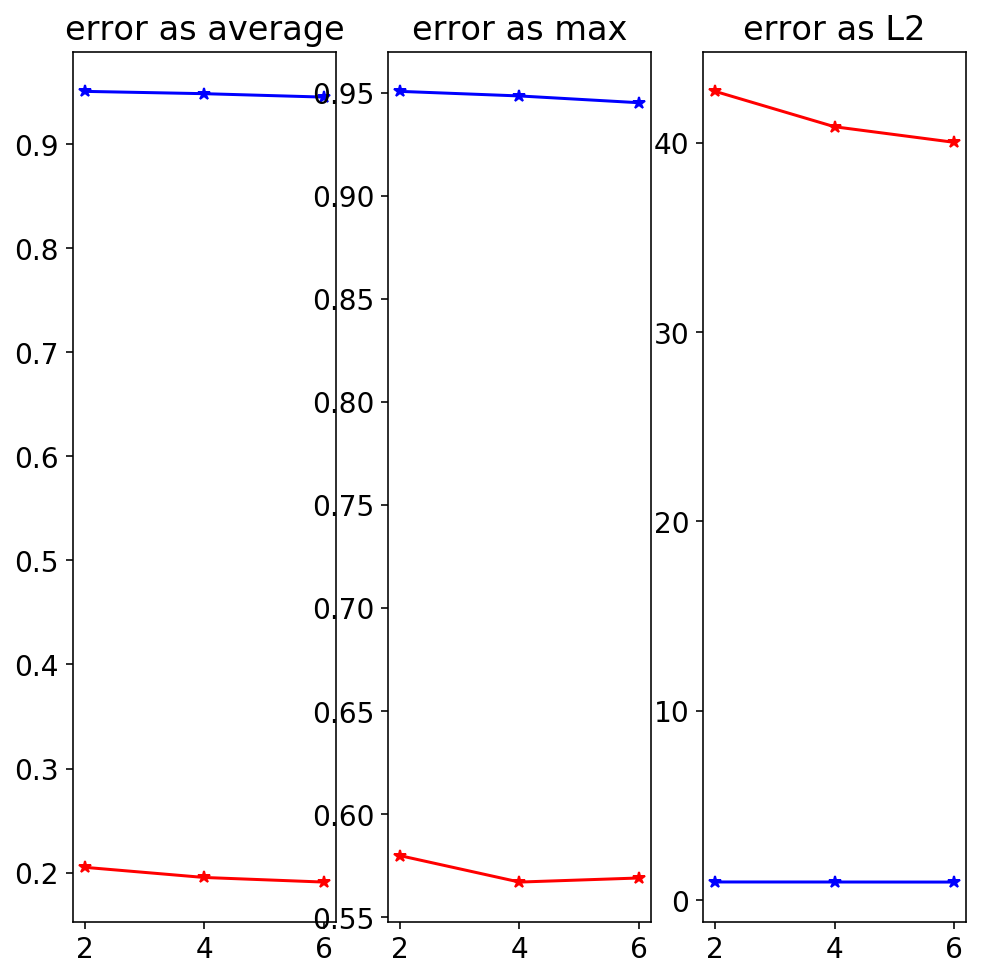

In [195]:
ax = plt.subplot(131)
plt.plot(splits, errors_means_avg, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as average')
ax = plt.subplot(132)
plt.plot(splits, errors_means_max, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as max')
ax = plt.subplot(133)
plt.plot(splits, errors_means_l2, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as L2')

### Slightly changing the definition of correlation
Following our discussion on [github issues](https://github.com/wildtreetech/advanced-comp-2017/issues/8) I decided to define the error as:
> error = average value of the entries of $C - I$

where:
- the correlation matrix $C \in \mathbb{R}^{N\times N}$ is defined based on the [Pearson product-moment correlation coefficients](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html), where we measure the **correlation in the errors**;
- $I$ is the identity matrix, included to account for the fact that the correlation of any variable with itself is 1.0, and such quantities could potentially skew the computation of the average

In [53]:
def get_error_correlation_matrix(forest, y_val):
    errors = np.zeros(shape=(len(forest.estimators_), y_val.shape[0]))
    for idx,tree in enumerate(forest.estimators_):
        y_pred = tree.predict(X_val)
        # difference is here
        errors[idx,:] = ( y_pred == y_val )
        
    C = np.corrcoef(errors)
    return C

In [54]:
def get_error_correlation_matrix_with_bagging(forest, y_val):
    errors = np.zeros(shape=(len(forest.estimators_), y_val.shape[0]))
    for idx,tree in enumerate(forest.estimators_):
        y_pred = tree.predict( X_val[:,forest.estimators_features_[idx]] )
        errors[idx,:] = ( y_pred == y_val )
        
    C = np.corrcoef(errors)
    return C

In [55]:
def error_as_average(C):
    N = C.shape[0]
    return np.mean( np.triu( C - np.diag(np.ones(N)) ) )

In [56]:
def error_as_max(C):
    N = C.shape[0]
    return np.abs( np.triu( C - np.diag(np.ones(N)) ) ).max()

In [57]:
def error_as_L2(C):
    N = C.shape[0]
    return np.linalg.norm( C )

In [58]:
def evaluate_classifier(clf,X_train,y_train,X_val, y_val):
    errors_avg = []
    errors_max = []
    errors_l2 = []
    scores = []
    for iter in range(100):
        clf.random_state = 42 + 3*iter
        clf.fit(X_train,y_train)
        C = get_error_correlation_matrix(clf, y_val)
        errors_avg.append(error_as_average(C))
        errors_max.append(error_as_max(C))
        errors_l2.append(error_as_L2(C))
        scores.append(forest.score(X_val, y_val))
    errors_avg = np.array(errors_avg)
    errors_max = np.array(errors_max)
    errors_l2 = np.array(errors_l2)
    scores = np.array(scores)
    return errors_avg,errors_max,errors_l2,scores

In [59]:
def evaluate_classifier_with_bagging(clf,X_train,y_train,X_val, y_val):
    errors_avg = []
    errors_max = []
    errors_l2 = []
    scores = []
    for iter in range(100):
        clf.random_state = 42 + 3*iter
        clf.fit(X_train,y_train)
        C = get_error_correlation_matrix_with_bagging(clf, y_val)
        errors_avg.append(error_as_average(C))
        errors_max.append(error_as_max(C))
        errors_l2.append(error_as_L2(C))
        scores.append(forest.score(X_val, y_val))
    errors_avg = np.array(errors_avg)
    errors_max = np.array(errors_max)
    errors_l2 = np.array(errors_l2)
    scores = np.array(scores)
    return errors_avg,errors_max,errors_l2,scores

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

forest = RandomForestClassifier(n_estimators=50)
errors_avg,errors_max,errors_l2,scores = evaluate_classifier( forest,X_train,y_train,X_val, y_val )

print('avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
print('max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
print('L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')

avg -- 0.0914687913468 -- 0.00262914685609 -- 0.92780945758
max -- 0.361580361405 -- 0.0208513816845 -- 0.92780945758
L2 -- 11.8714015758 -- 0.209411087702 -- 0.92780945758


In [61]:
from sklearn.ensemble import BaggingClassifier

errors_means_avg = []
errors_means_max = []
errors_means_l2 = []
score_means = []

#feats_percents = np.logspace(start=-12.0,stop=0.0, num=6, base=1.25)
feats_percents = [0.1, 0.17, 0.25, 0.37, 0.50, 0.75]

for feat in feats_percents:
    forest = BaggingClassifier(max_features=feat, n_estimators=50)
    errors_avg,errors_max,errors_l2,scores = evaluate_classifier_with_bagging( forest,X_train,y_train,X_val, y_val )

    print(feat,'avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
    print(feat,'max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
    print(feat,'L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')
    errors_means_avg.append(np.mean(errors_avg))
    errors_means_max.append(np.mean(errors_max))
    errors_means_l2.append(np.mean(errors_l2))
    score_means.append(np.mean(scores))

0.1 -- avg -- 0.0397071856919 -- 0.00276353257318 -- 0.875639777469
0.1 -- max -- 0.3186181793 -- 0.0384588758908 -- 0.875639777469
0.1 -- L2 -- 8.61618796886 -- 0.140747362815 -- 0.875639777469
0.17 -- avg -- 0.060874664433 -- 0.00281918539537 -- 0.913031988873
0.17 -- max -- 0.33125079774 -- 0.0278941169046 -- 0.913031988873
0.17 -- L2 -- 9.76888549424 -- 0.181370025135 -- 0.913031988873
0.25 -- avg -- 0.0813874341912 -- 0.00311232783453 -- 0.923845618915
0.25 -- max -- 0.372740350208 -- 0.0291502463787 -- 0.923845618915
0.25 -- L2 -- 11.1744742522 -- 0.234329894496 -- 0.923845618915
0.37 -- avg -- 0.0955049865744 -- 0.00302867714552 -- 0.924401947149
0.37 -- max -- 0.403207875431 -- 0.0272180522143 -- 0.924401947149
0.37 -- L2 -- 12.2773811912 -- 0.242719114443 -- 0.924401947149
0.5 -- avg -- 0.109385735414 -- 0.00373102946581 -- 0.917503477051
0.5 -- max -- 0.445921350303 -- 0.0356290210074 -- 0.917503477051
0.5 -- L2 -- 13.4306257644 -- 0.318365031825 -- 0.917503477051
0.75 -- avg

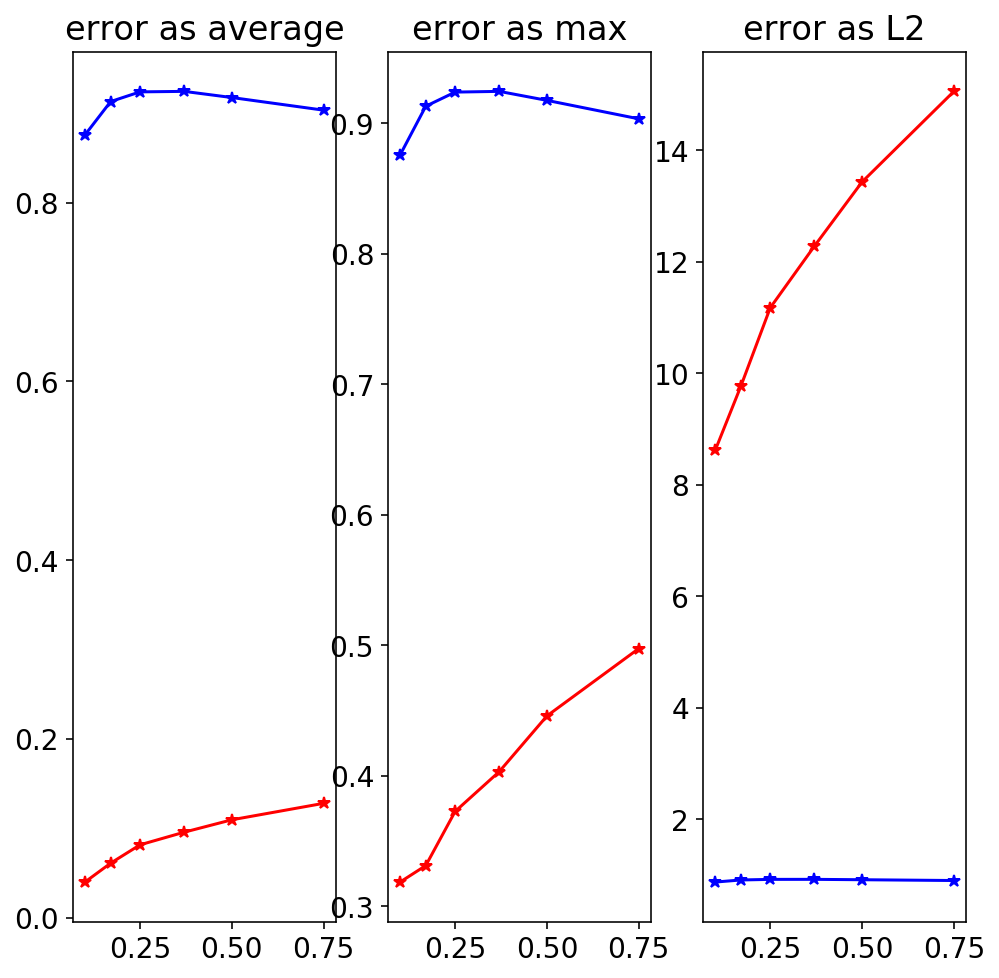

In [62]:
ax = plt.subplot(131)
plt.plot(feats_percents, errors_means_avg, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as average')
ax = plt.subplot(132)
plt.plot(feats_percents, errors_means_max, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as max')
ax = plt.subplot(133)
plt.plot(feats_percents, errors_means_l2, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as L2')

In [174]:
from sklearn.ensemble import ExtraTreesClassifier

errors_means_avg = []
errors_means_max = []
errors_means_l2 = []
score_means = []

splits = [2, 4, 6]
for split in splits:
    forest = ExtraTreesClassifier(min_samples_split=split, n_estimators=100)
    errors_avg,errors_max,errors_l2,scores = evaluate_classifier( forest,X_train,y_train,X_val, y_val )

    print(split,'avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
    print(split,'max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
    print(split,'L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')
    errors_means_avg.append(np.mean(errors_avg))
    errors_means_max.append(np.mean(errors_max))
    errors_means_l2.append(np.mean(errors_l2))
    score_means.append(np.mean(scores))

2 -- avg -- 0.0876451124627 -- 0.0016533235025 -- 0.950625869263
2 -- max -- 0.325549178026 -- 0.013843116173 -- 0.950625869263
2 -- L2 -- 20.613173932 -- 0.284118119104 -- 0.950625869263
4 -- avg -- 0.0882382144871 -- 0.001548337397 -- 0.948407510431
4 -- max -- 0.330207525392 -- 0.0146461852748 -- 0.948407510431
4 -- L2 -- 20.7369302518 -- 0.266180073119 -- 0.948407510431
6 -- avg -- 0.0884644938087 -- 0.00148812434662 -- 0.945125173853
6 -- max -- 0.343624821973 -- 0.0159082142667 -- 0.945125173853
6 -- L2 -- 20.8122144045 -- 0.258569464724 -- 0.945125173853


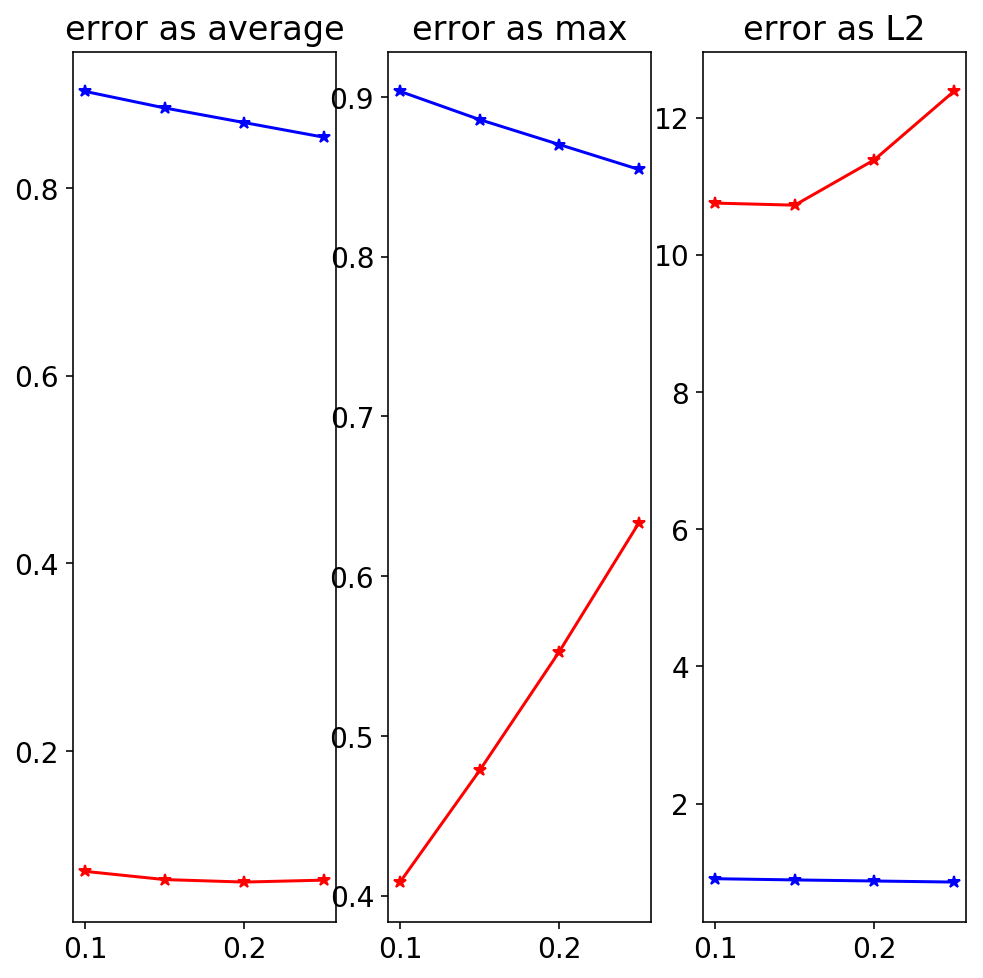

In [64]:
ax = plt.subplot(131)
plt.plot(splits, errors_means_avg, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as average')
ax = plt.subplot(132)
plt.plot(splits, errors_means_max, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as max')
ax = plt.subplot(133)
plt.plot(splits, errors_means_l2, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as L2')

---

## Question 2

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the digits dataset. You might have to tune `n_estimators` to get good performance. Which parts of the images is the most important and do you agree with the interpretation of the classifiers? (Bonus) Do the importances change if you change to problem to be a classification problem of odd vs even digit?

You can load the data set with: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

# Summary of results

### Scores

The scores obtained by the different methods were:
- Random Forest     : 94.30%
- Extra Trees       : 95.69%
- Gradient Boosting : 89.30%

As in question 1, strangely the less sophisticated method appears to get better results. However, this could be an artifact of how simple the dataset is, or just its particular structure.
For tuning the `num_estimators` hyperparameter, for Random Forest and Extra Trees I just increased it until there wasn't any improvement. For Gradient Boosting I performed a grid search over some parameters that I believed to be plausible. It was surprising to me to see that the only relevant parameter for accuracy was `num_estimators`, and neither `max_depth` nor `learning_rate` appeared to have much effect on this dataset, when it come to achieving max accuracy (they obviously had local effects). 

### Feature importance

The reported feature importances for each method are shown here.

<img src="images/importances_RandomForest.png" style="float: left" width="30%" height="30%"/>
<img src="images/importances_ExtraTrees.png" style="float: left" width="30%" height="30%"/>
<img src="images/importances_GradientBoosted.png" style="float: left" width="30%" height="30%"/>
<p style="clear: both;">

The first remark to make is that all methods assign a markedly low importance to the left and right borders, but not so much to the top and bottom ones. This is to be expected since all the images have been centered.
The second remark is that Random Forests and Extra Trees display very similar feature importances. Indeed, 4 out of the top 5 features are the same and in the same order for these two methods. Both methods appear to have an horizontal S shape in their pattern of feature importance, concentrated in the center of the images. I guess this can be attributed to the fact whether a digit has a horizontal line at its center (e.g. 3,4,5,6,8) is a good discriminatory feature.

Gradient Boosting appears to be quite different from the other two methods. First of all, its feature importances seem more _spread out_ as opposed to concentrated in the center. It also assigns some importance to the lower right pixels, that the other two methods ignored. I am guessing this has something to do with how the residuals look like in the iterative process, but I am still quite confused by it.

### Bonus: binary classification

The reported feature importances for each method are shown here.

<img src="images/importances_RandomForest_binary.png" style="float: left" width="30%" height="30%"/>
<img src="images/importances_ExtraTrees_binary.png" style="float: left" width="30%" height="30%"/>
<img src="images/importances_GradientBoosted_binary.png" style="float: left" width="30%" height="30%"/>
<p style="clear: both;">

The feature importances appear to have dramatically changed, although they still retain some features of the previous ones. Firstly, the most important pixel doesn't change between the multi-class and the binary classification tasks. Moreover, the central-vertical dimension of feature importances remains intact. However, there seems to be a much lower _spread_ of importances in the binary classification. This is less visible in the GradientBoosted case, possibly because the _spread_ was already large in the multi-class task.

The obtained scores are:
- Random Forest     : 94.92%
- Extra Trees       : 96.11%
- Gradient Boosting : 94.43%

An interesting thing to note here is that, while all the scores somehow improved when moving to the simpler binary classification task, the GradienBoosting score showed a much more significant improvement, although the Extra Trees remain the most accurate on this dataset.


## RandomForest

In [134]:
forest = RandomForestClassifier(n_estimators=1200)
forest.random_state = 42*42
forest.fit(X_train,y_train)
forest.score(X_val, y_val)

0.94297635605006958

Feature ranking:
1. feature 42 (0.043551)
2. feature 36 (0.042310)
3. feature 21 (0.038437)
4. feature 28 (0.037771)
5. feature 33 (0.036302)
6. feature 26 (0.035445)
7. feature 30 (0.035366)
8. feature 43 (0.034313)
9. feature 10 (0.030143)
10. feature 20 (0.027448)
11. feature 58 (0.027106)
12. feature 34 (0.027029)
13. feature 51 (0.026572)
14. feature 60 (0.026002)
15. feature 13 (0.025260)
16. feature 38 (0.025062)
17. feature 29 (0.024878)
18. feature 2 (0.023927)
19. feature 53 (0.023853)
20. feature 61 (0.023469)
21. feature 18 (0.023223)
22. feature 27 (0.022983)
23. feature 46 (0.021178)
24. feature 41 (0.020724)
25. feature 44 (0.019953)
26. feature 50 (0.019908)
27. feature 19 (0.019617)
28. feature 37 (0.018283)
29. feature 54 (0.018007)
30. feature 5 (0.016636)
31. feature 25 (0.016629)
32. feature 35 (0.016620)
33. feature 45 (0.016618)
34. feature 12 (0.014851)
35. feature 62 (0.014474)
36. feature 59 (0.013020)
37. feature 52 (0.012889)
38. feature 9 (0.012650)
39. fea

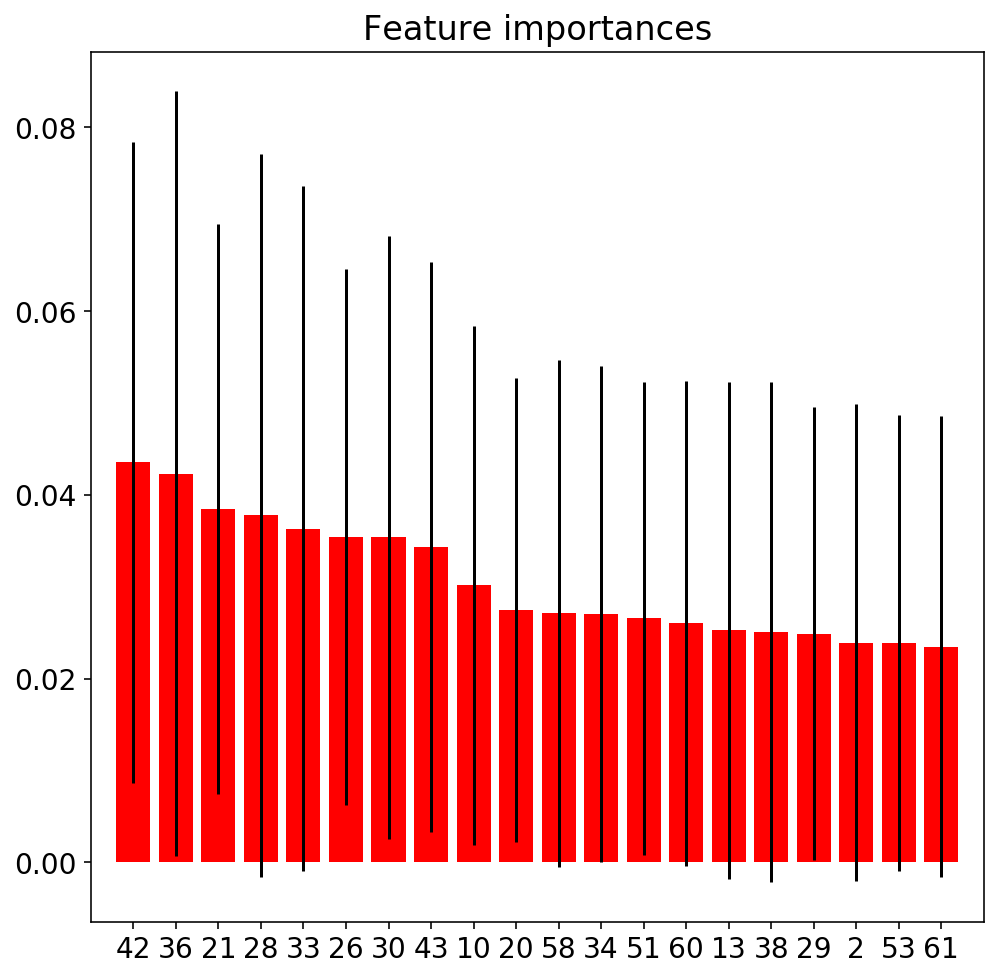

In [135]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
# only plot the M most important
M = 20
most_important = indices[:M]
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(M), importances[most_important],
       color="r", yerr=std[most_important], align="center")
plt.xticks(range(M), most_important)
plt.xlim([-1, M])
plt.show()

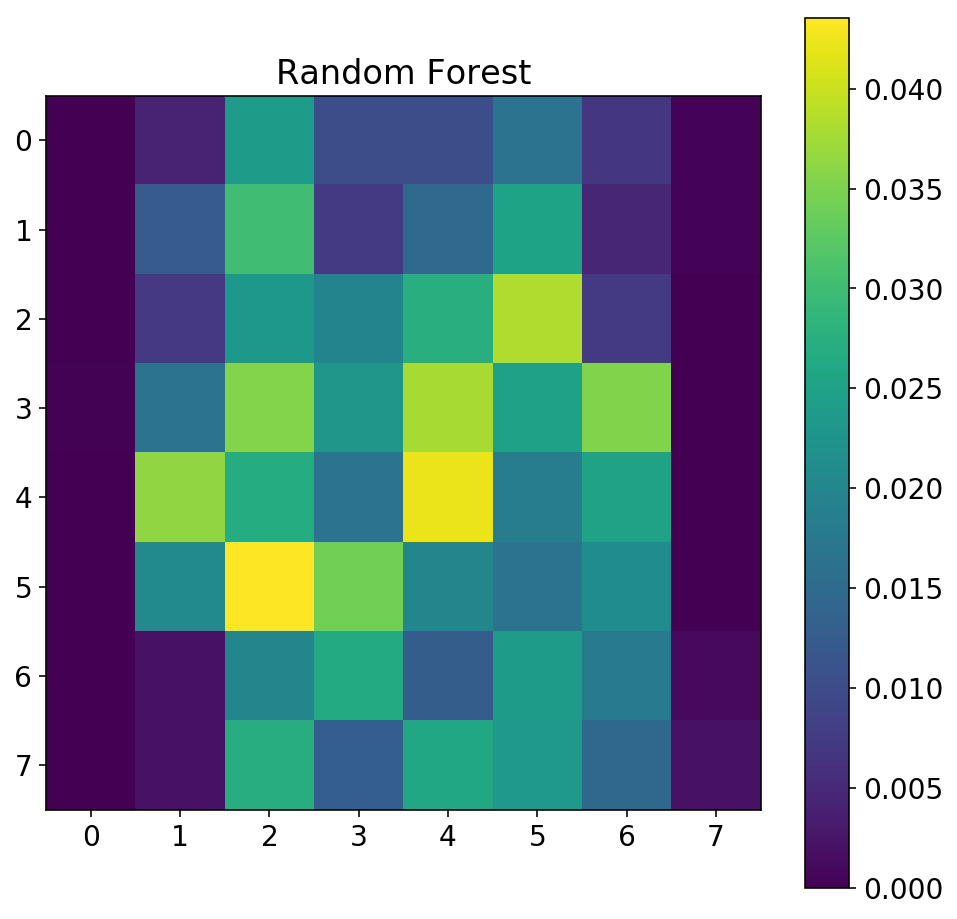

In [136]:
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Random Forest')
plt.savefig('images/importances_RandomForest.png')

## ExtraTrees

In [169]:
forest = ExtraTreesClassifier(n_estimators=1200)
forest.random_state = 42*42
forest.fit(X_train,y_train)
forest.score(X_val, y_val)

0.95688456189151594

Feature ranking:
1. feature 42 (0.045698)
2. feature 21 (0.039596)
3. feature 36 (0.037099)
4. feature 26 (0.035039)
5. feature 43 (0.033663)
6. feature 33 (0.033221)
7. feature 28 (0.032185)
8. feature 30 (0.030703)
9. feature 10 (0.029978)
10. feature 34 (0.028343)
11. feature 20 (0.026993)
12. feature 27 (0.025349)
13. feature 13 (0.024761)
14. feature 44 (0.024386)
15. feature 58 (0.024111)
16. feature 38 (0.024090)
17. feature 60 (0.023973)
18. feature 53 (0.023215)
19. feature 18 (0.023030)
20. feature 61 (0.022680)
21. feature 2 (0.022446)
22. feature 35 (0.022187)
23. feature 37 (0.021937)
24. feature 51 (0.021844)
25. feature 29 (0.021464)
26. feature 19 (0.020901)
27. feature 46 (0.019866)
28. feature 50 (0.019862)
29. feature 5 (0.018188)
30. feature 54 (0.017648)
31. feature 45 (0.017145)
32. feature 41 (0.016703)
33. feature 25 (0.016099)
34. feature 62 (0.015987)
35. feature 59 (0.014501)
36. feature 12 (0.012838)
37. feature 52 (0.012559)
38. feature 3 (0.012483)
39. fea

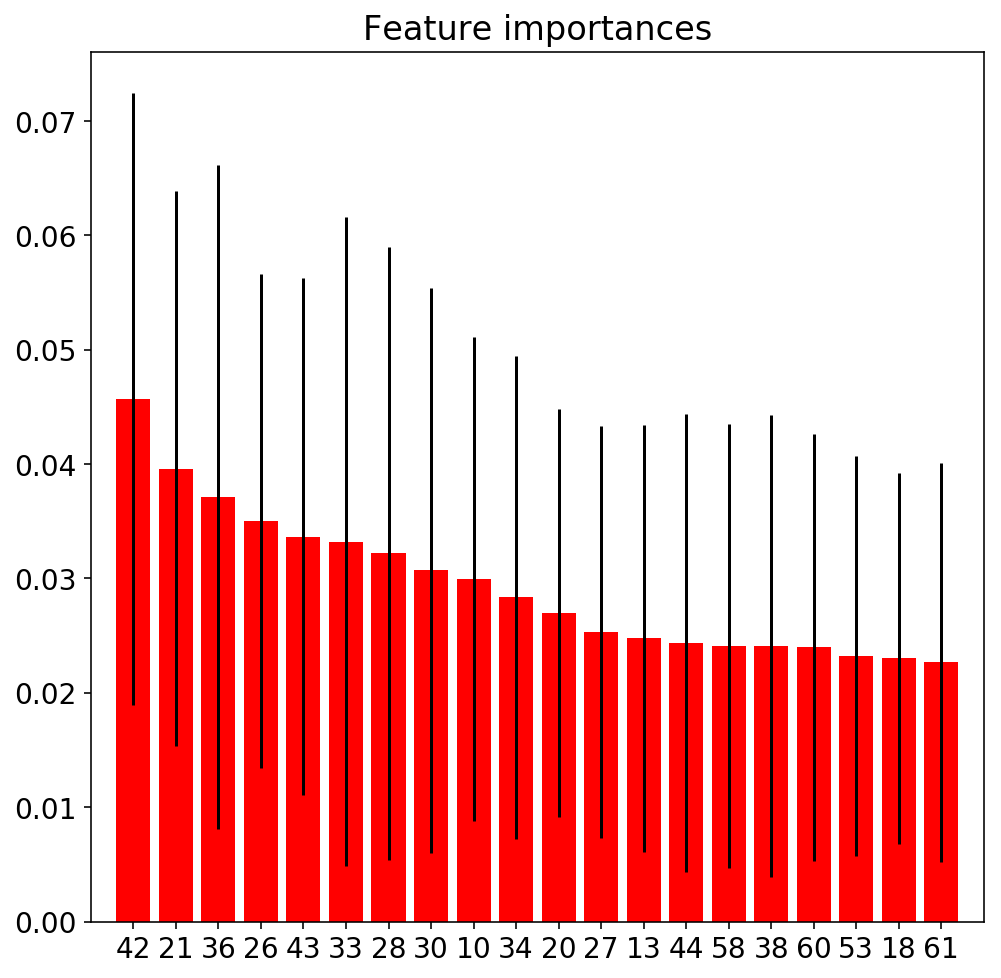

In [170]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
# only plot the M most important
M = 20
most_important = indices[:M]
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(M), importances[most_important],
       color="r", yerr=std[most_important], align="center")
plt.xticks(range(M), most_important)
plt.xlim([-1, M])
plt.show()

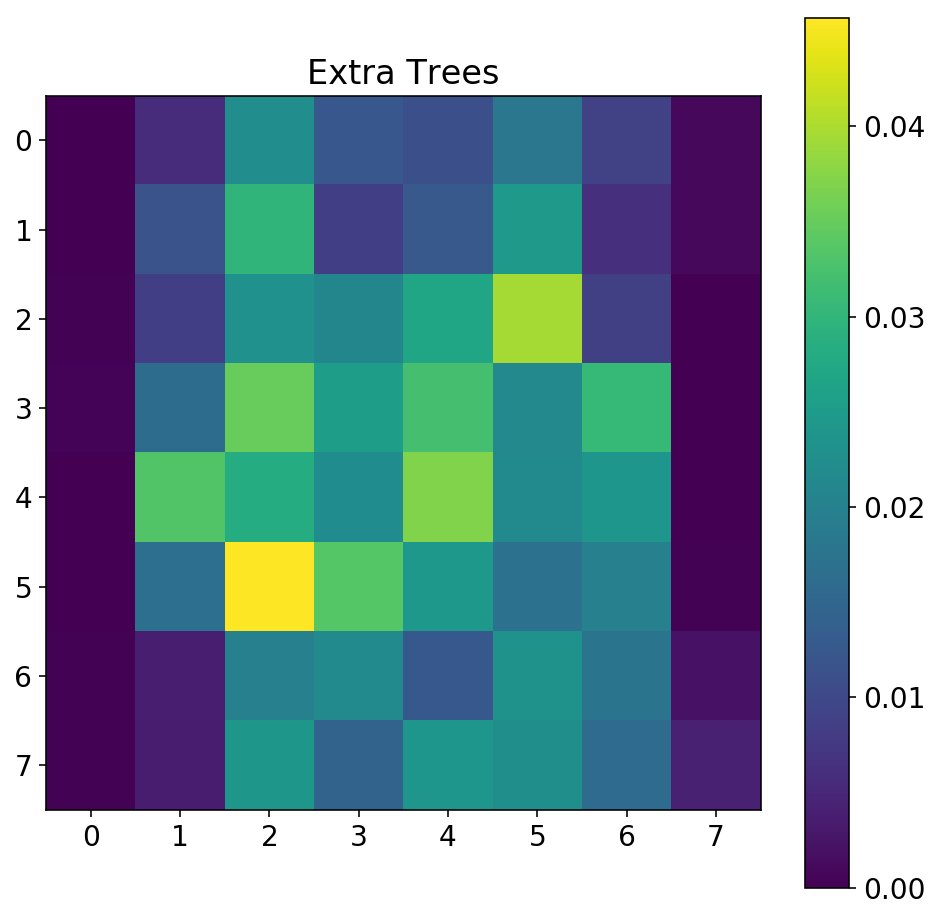

In [171]:
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Extra Trees')
plt.savefig('images/importances_ExtraTrees.png')

### GradientBoosted

In [160]:
n_estimators = [100, 200, 400, 800, 1200]
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.4]
max_depth = [1, 2, 3, 4]
for n in n_estimators:
    for r in learning_rates:
        for d in max_depth:
            forest = GradientBoostingClassifier(n_estimators=n, loss='deviance', learning_rate=r, max_depth=d)
            forest.random_state = 42*42
            forest.fit(X_train,y_train)
            print(n, r, d, forest.score(X_val, y_val))

100 0.01 1 0.710013908206
100 0.01 2 0.794158553547
100 0.01 3 0.82545201669
100 0.01 4 0.803894297636
100 0.05 1 0.84561891516
100 0.05 2 0.86926286509
100 0.05 3 0.875521557719
100 0.05 4 0.855354659249
100 0.1 1 0.868567454798
100 0.1 2 0.8859527121
100 0.1 3 0.883866481224
100 0.1 4 0.86578581363
100 0.2 1 0.88247566064
100 0.2 2 0.888734353268
100 0.2 3 0.883866481224
100 0.2 4 0.856050069541
100 0.4 1 0.884561891516
100 0.4 2 0.892211404729
100 0.4 3 0.874826147427
100 0.4 4 0.858136300417
200 0.01 1 0.7719054242
200 0.01 2 0.84561891516
200 0.01 3 0.84909596662
200 0.01 4 0.829624478442
200 0.05 1 0.867872044506
200 0.05 2 0.878998609179
200 0.05 3 0.883866481224
200 0.05 4 0.858831710709
200 0.1 1 0.878998609179
200 0.1 2 0.892906815021
200 0.1 3 0.883866481224
200 0.1 4 0.86578581363
200 0.2 1 0.881780250348
200 0.2 2 0.888734353268
200 0.2 3 0.883866481224
200 0.2 4 0.856050069541
200 0.4 1 0.890820584145
200 0.4 2 0.892211404729
200 0.4 3 0.874826147427
200 0.4 4 0.858136300

In [164]:
hyperparams = np.loadtxt("GradientBoosting_hyperparams_Question2.dat")
print (np.max(hyperparams[:,-1]))
print (hyperparams[ hyperparams[:,-1] == np.max(hyperparams[:,-1]), : ] )

0.892906815021
[[  2.00000000e+02   1.00000000e-01   2.00000000e+00   8.92906815e-01]
 [  4.00000000e+02   1.00000000e-01   2.00000000e+00   8.92906815e-01]
 [  8.00000000e+02   1.00000000e-01   2.00000000e+00   8.92906815e-01]
 [  1.20000000e+03   1.00000000e-01   2.00000000e+00   8.92906815e-01]]


In [165]:
from sklearn.ensemble import GradientBoostingClassifier
forest = GradientBoostingClassifier(n_estimators=200, loss='deviance', learning_rate=0.1, max_depth=2)
forest.random_state = 42*42
forest.fit(X_train,y_train)
forest.score(X_val, y_val)

0.89290681502086233

Feature ranking:
1. feature 21 (0.041141)
2. feature 4 (0.031812)
3. feature 42 (0.027886)
4. feature 51 (0.024087)
5. feature 29 (0.024012)
6. feature 20 (0.023843)
7. feature 43 (0.022709)
8. feature 28 (0.020823)
9. feature 26 (0.019869)
10. feature 36 (0.019279)
11. feature 60 (0.016368)
12. feature 9 (0.015310)
13. feature 12 (0.015047)
14. feature 18 (0.014970)
15. feature 27 (0.014939)
16. feature 45 (0.014708)
17. feature 33 (0.014669)
18. feature 50 (0.014207)
19. feature 58 (0.013915)
20. feature 63 (0.013708)
21. feature 61 (0.013118)
22. feature 30 (0.012957)
23. feature 5 (0.012937)
24. feature 46 (0.012817)
25. feature 55 (0.012386)
26. feature 59 (0.011868)
27. feature 37 (0.011383)
28. feature 10 (0.010970)
29. feature 16 (0.010929)
30. feature 34 (0.010546)
31. feature 3 (0.009908)
32. feature 62 (0.009818)
33. feature 19 (0.009571)
34. feature 25 (0.009385)
35. feature 22 (0.009322)
36. feature 53 (0.009133)
37. feature 11 (0.009092)
38. feature 2 (0.009050)
39. featu

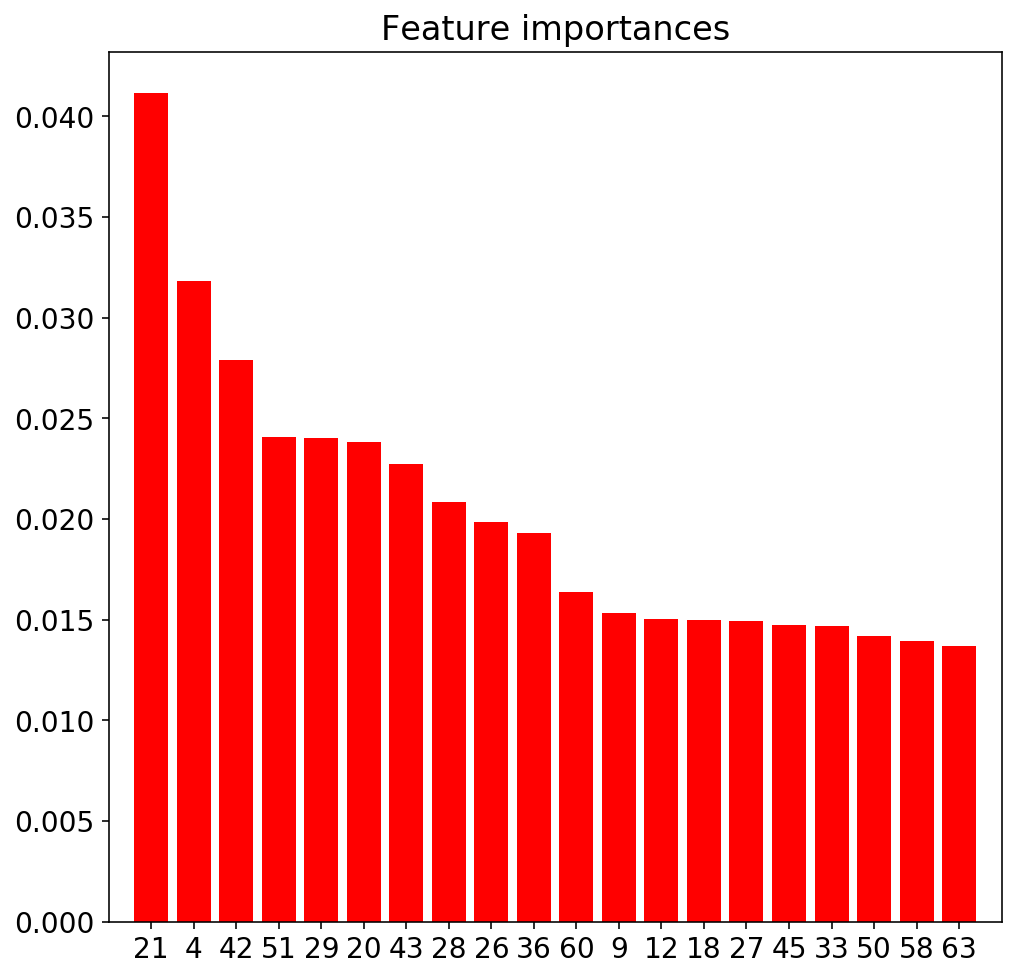

In [166]:
importances = forest.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
# only plot the M most important
M = 20
most_important = indices[:M]
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
#plt.bar(range(M), importances[most_important],
#       color="r", yerr=std[most_important], align="center")
plt.bar(range(M), importances[most_important],
       color="r", align="center")
plt.xticks(range(M), most_important)
plt.xlim([-1, M])
plt.show()

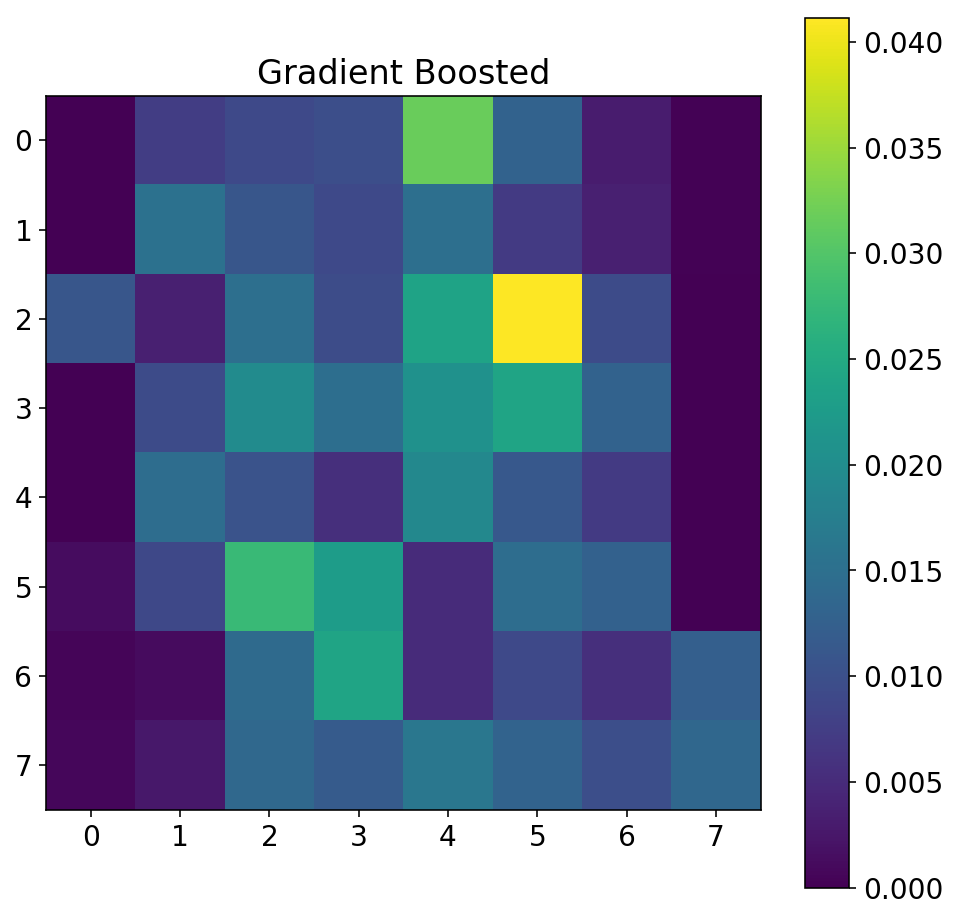

In [167]:
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Gradient Boosted')
plt.savefig('images/importances_GradientBoosted.png')

## Bonus: binary classification

In [179]:
y_train_binary = y_train % 2
y_val_binary = y_val % 2
print(y_val_binary)

[0 1 1 ..., 1 1 0]


0.949235048679


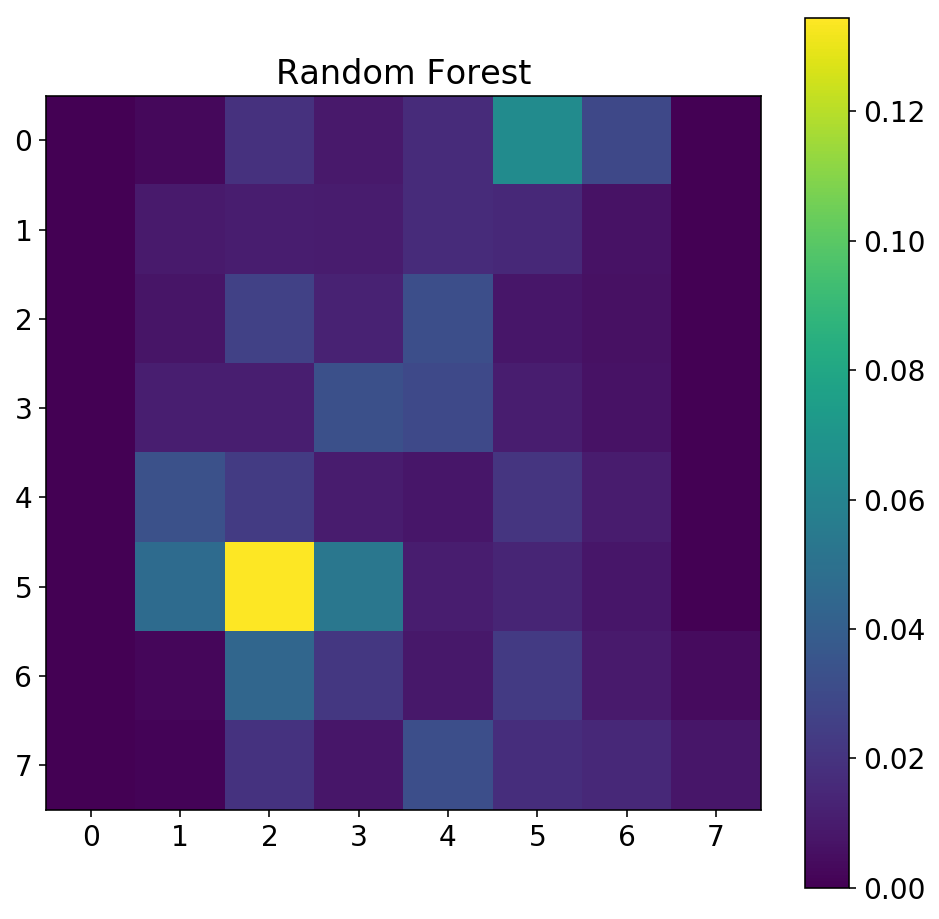

In [189]:
forest = RandomForestClassifier(n_estimators=1200)
forest.random_state = 42*42
forest.fit(X_train,y_train_binary)
print(forest.score(X_val, y_val_binary))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Random Forest')
plt.savefig('images/importances_RandomForest_binary.png')

0.961057023644


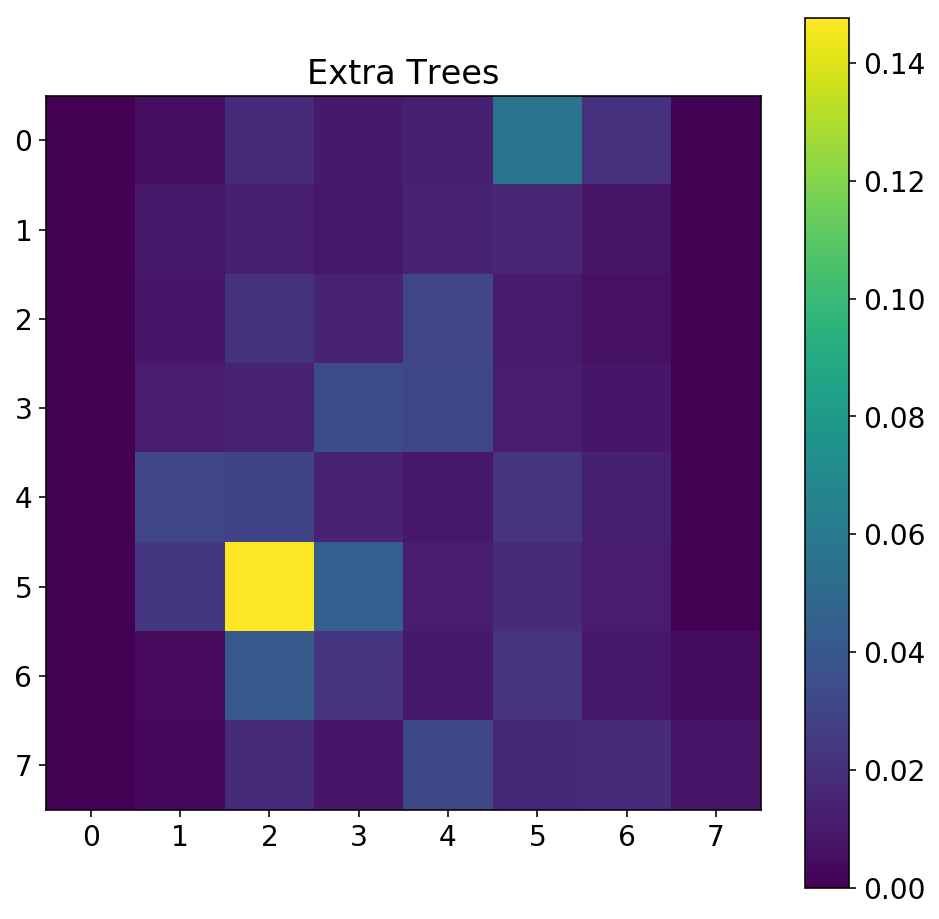

In [190]:
forest = ExtraTreesClassifier(n_estimators=1200)
forest.random_state = 42*42
forest.fit(X_train,y_train_binary)
print(forest.score(X_val, y_val_binary))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Extra Trees')
plt.savefig('images/importances_ExtraTrees_binary.png')

0.944367176634


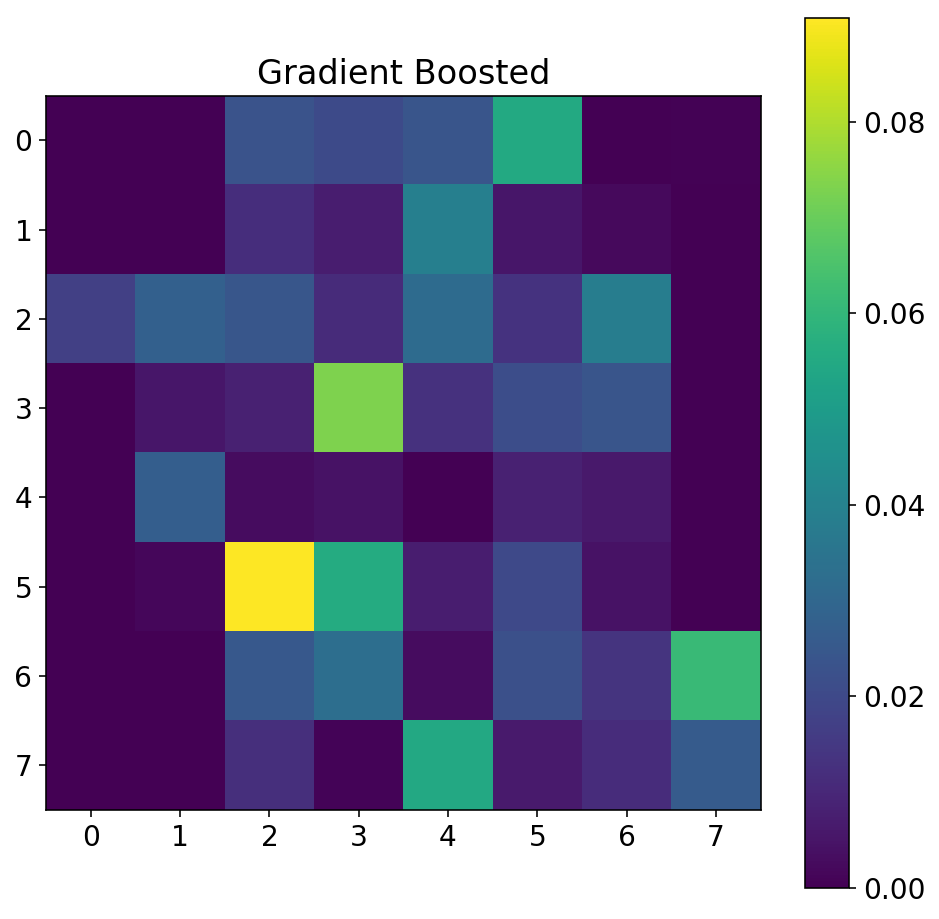

In [191]:
forest = GradientBoostingClassifier(n_estimators=200, loss='deviance', learning_rate=0.1, max_depth=2)
forest.random_state = 42*42
forest.fit(X_train,y_train_binary)
print(forest.score(X_val, y_val_binary))
importances = forest.feature_importances_
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Gradient Boosted')
plt.savefig('images/importances_GradientBoosted_binary.png')

---

## Question 3

This is a regression problem. Use a gradient boosted tree regressor (tune the `max_depth`, `learning_rate` and `n_estimators` parameters) to study the importance of the different features as well as the partial dependence of the output on individual features as well as pairs of features.

* can you identify uninformative features?
* how do the interactions between the features show up in the partial dependence plots?

(Help: `rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
` seems to work quite well)
(Help: to produce 1D and 2D partial dependence plots pass `[0,1, (0,1)]` as the `features` argument of `plot_partial_dependence`. More details in the function's documentation.)


In [238]:
from sklearn.ensemble import GradientBoostingRegressor

def make_data(n_samples=800, n_features=8, noise=0.2, random_state=2):
    generator = check_random_state(random_state)

    X = generator.rand(n_samples, n_features)
    y = 10 * (X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 \
        + 10 * X[:, 3] + 10 * X[:, 4] + noise * generator.randn(n_samples)

    return X, y

X,y = make_data()

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.8,random_state=42)

# Summary of results

### Feature importance

Reminder from [Scikit doc](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier): The importance of a feature is computed as the (normalized) total reduction of the impurity criterion brought by that feature.

From the way the $y$ data is generated and the above definition of importance, I make the following assumptions:
- features 3,4 are the most informative, because they are used in the generation of $y$ but also include noise;
- features 0,1,2 are informative, but not so much because they don't have any noise, and as such the reduction of impurity brought by separating them is smaller than if they had noise;
- features 5,6,7 are uninformative.

The GradientBoostingRegressor gives the following importance ranking: 2,7,3,5,4,0,1,6. We see that it makes several mistakes on this dataset in terms of importance, by believing that 7 is the second most-informative feature and that 4 is only the sixth most informative. 
The ExtraTreesRegressor, on the other hand, gives very clear results that are in line with my previous assumptions. 

Strangely, the GradientBoostingRegressor achieves a much higher score (defined here as the $R^2$ coefficient) even though it fails to recognize the most informative features.

### Partial dependence plot

The results from the partial dependence plots are quite stunning.
<img src="images/partial_dependence_GradientBoosting.png" />

These plots are able to recover the nature of dependence of the individual variables, for example the quadratic dependence on feature 2. Unfortunately, it is difficult for such plots to highlight interactions between features, such as the product of features 0 and 1. Nonetheless, they are a very valuable source of information.

#### Tuning hyperparameters

In [240]:
n_estimators= [100, 200, 400]
max_depth= [1,2]
learning_rate = [0.05, 0.1, 0.2, 0.4, 0.6]
scores = np.zeros((len(n_estimators)*len(max_depth)*len(learning_rate),4))
row=0
for n in n_estimators:
    for d in max_depth:
        for r in learning_rate:
            rgr = GradientBoostingRegressor(n_estimators=n, max_depth=d, learning_rate=r)
            rgr.fit(X_train,y_train)
            score = rgr.score(X_val,y_val)
            scores[row,0] = n
            scores[row,1] = d
            scores[row,2] = r
            scores[row,3] = score
            row += 1

print(scores)
print(np.max(scores[:,-1]))
print(scores[ scores[:,-1] == np.max(scores[:,-1]) ,:] )

[[  1.00000000e+02   1.00000000e+00   5.00000000e-02   6.87993715e-01]
 [  1.00000000e+02   1.00000000e+00   1.00000000e-01   8.19922042e-01]
 [  1.00000000e+02   1.00000000e+00   2.00000000e-01   9.06487162e-01]
 [  1.00000000e+02   1.00000000e+00   4.00000000e-01   9.27636684e-01]
 [  1.00000000e+02   1.00000000e+00   6.00000000e-01   9.21018210e-01]
 [  1.00000000e+02   2.00000000e+00   5.00000000e-02   8.46892323e-01]
 [  1.00000000e+02   2.00000000e+00   1.00000000e-01   9.15205259e-01]
 [  1.00000000e+02   2.00000000e+00   2.00000000e-01   9.35219627e-01]
 [  1.00000000e+02   2.00000000e+00   4.00000000e-01   9.24009821e-01]
 [  1.00000000e+02   2.00000000e+00   6.00000000e-01   8.84461025e-01]
 [  2.00000000e+02   1.00000000e+00   5.00000000e-02   8.17853135e-01]
 [  2.00000000e+02   1.00000000e+00   1.00000000e-01   9.01455572e-01]
 [  2.00000000e+02   1.00000000e+00   2.00000000e-01   9.31543385e-01]
 [  2.00000000e+02   1.00000000e+00   4.00000000e-01   9.33305806e-01]
 [  2.

In [241]:
rgr = GradientBoostingRegressor(n_estimators=400, max_depth=2, learning_rate=0.2)
rgr.random_state = 42
rgr.fit(X_train,y_train)
score = rgr.score(X_val,y_val)
print(score)

0.937810573349


Feature ranking:
1. feature 2 (0.148868)
2. feature 7 (0.135585)
3. feature 3 (0.126182)
4. feature 5 (0.122954)
5. feature 0 (0.120760)
6. feature 4 (0.118003)
7. feature 1 (0.116197)
8. feature 6 (0.111452)


([<matplotlib.axis.XTick at 0x10ded7c18>,
 <a list of 8 Text xticklabel objects>)

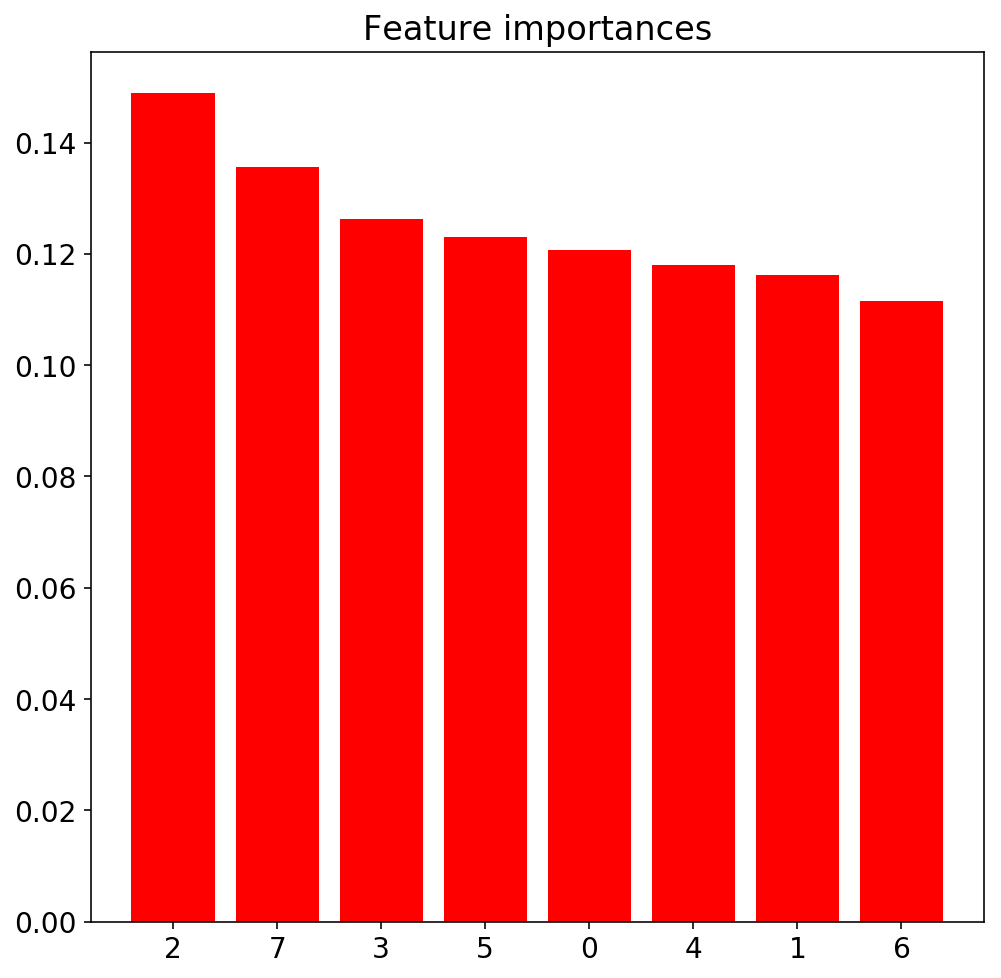

In [242]:
importances = rgr.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")

plt.bar(range(len(indices)), importances[indices],
       color="r", align="center")
plt.xticks(range(len(indices)), indices)


In [229]:
from sklearn.ensemble import ExtraTreesRegressor
rgr = ExtraTreesRegressor(n_estimators=400)
rgr.fit(X_train,y_train)
score = rgr.score(X_val,y_val)
print(score)

0.816586215005


Feature ranking:
1. feature 4 (0.434095)
2. feature 3 (0.315245)
3. feature 1 (0.091427)
4. feature 0 (0.058058)
5. feature 2 (0.038130)
6. feature 7 (0.023082)
7. feature 5 (0.021731)
8. feature 6 (0.018232)


([<matplotlib.axis.XTick at 0x1103a6828>,
 <a list of 8 Text xticklabel objects>)

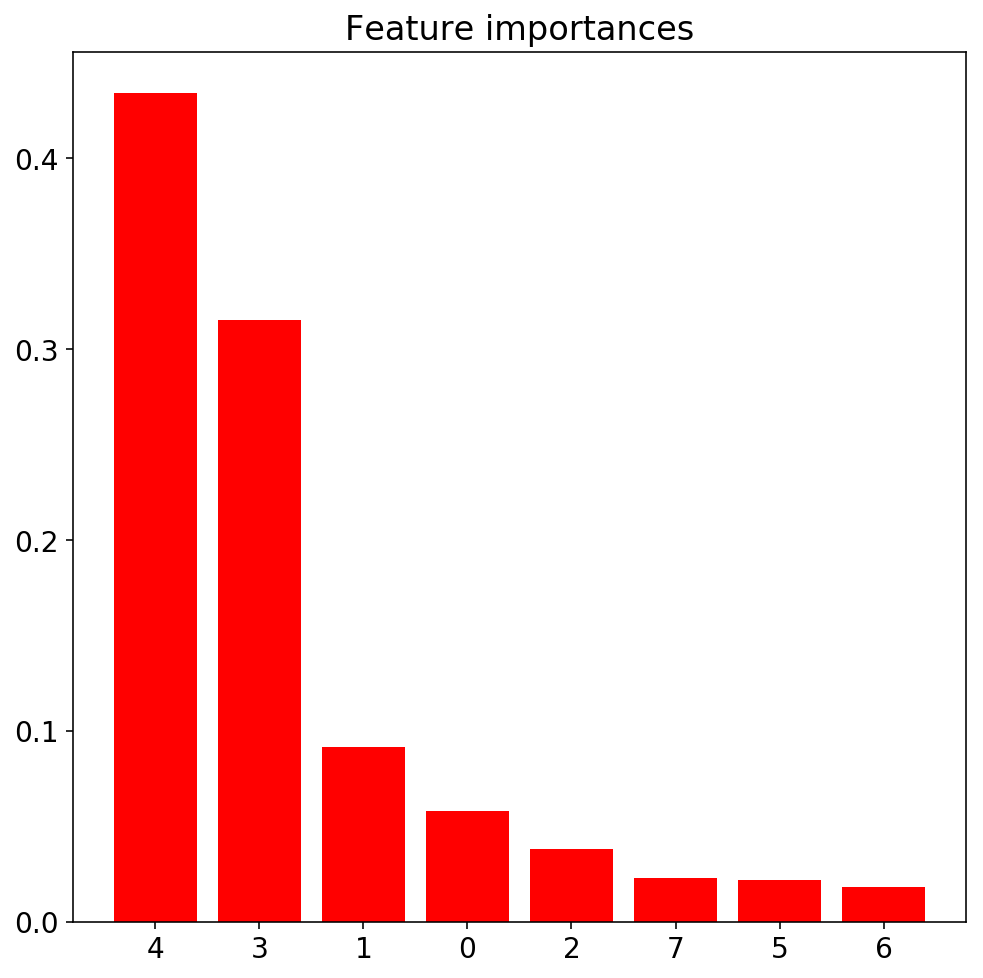

In [230]:
importances = rgr.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")

plt.bar(range(len(indices)), importances[indices],
       color="r", align="center")
plt.xticks(range(len(indices)), indices)


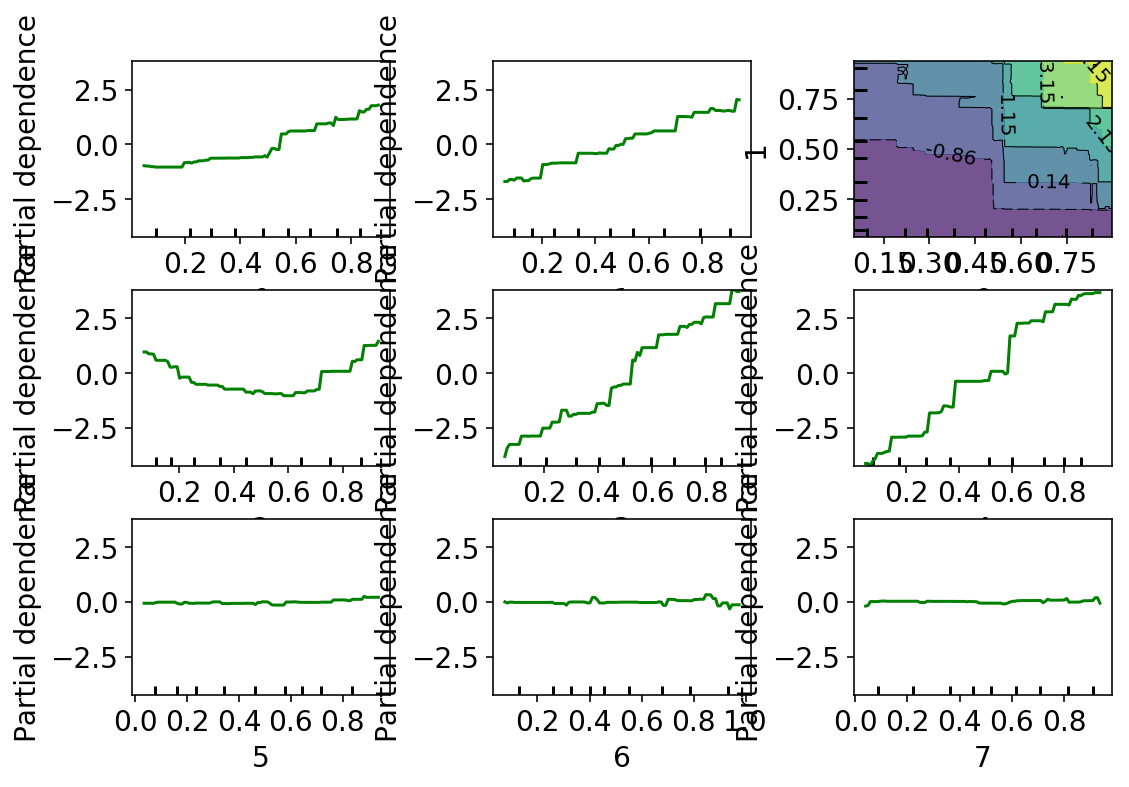

In [253]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

rgr = GradientBoostingRegressor(n_estimators=400, max_depth=2, learning_rate=0.2)
rgr.random_state = 42
features = [0, 1, (0,1), 2,3, 4,5,6,7]
rgr.fit(X_train,y_train)
fig, axs = plot_partial_dependence(rgr, X_train, features)
plt.savefig('images/partial_dependence_GradientBoosting.png')

---

## (Bonus) Question 4

House prices in California. Use a gradient boosted regression tree model to build a model that can predict house prices in California (`GradientBoostingRegressor` is your friend).

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

In [254]:
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

# if the above doesn't work, download `cal_housing_py3.pkl` from the GitHub repository
# and adjust the path to the downloaded file which is passed to `load()`
# uncomment the following lines
#from sklearn.externals.joblib import load
#d = load('/home/username/Downloads/cal_housing_py3.pkz')
#X, y = d[:,1:], d[:,0]/100000
#X[:, 2] /= X[:, 5]
#X[:, 3] /= X[:, 5]
#X[:, 5] = X[:, 4] / X[:, 5]

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to /Users/cremones/scikit_learn_data


In [260]:
print(cal_housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [ ]:
X = cal_housing.data
y = cal_housing.target

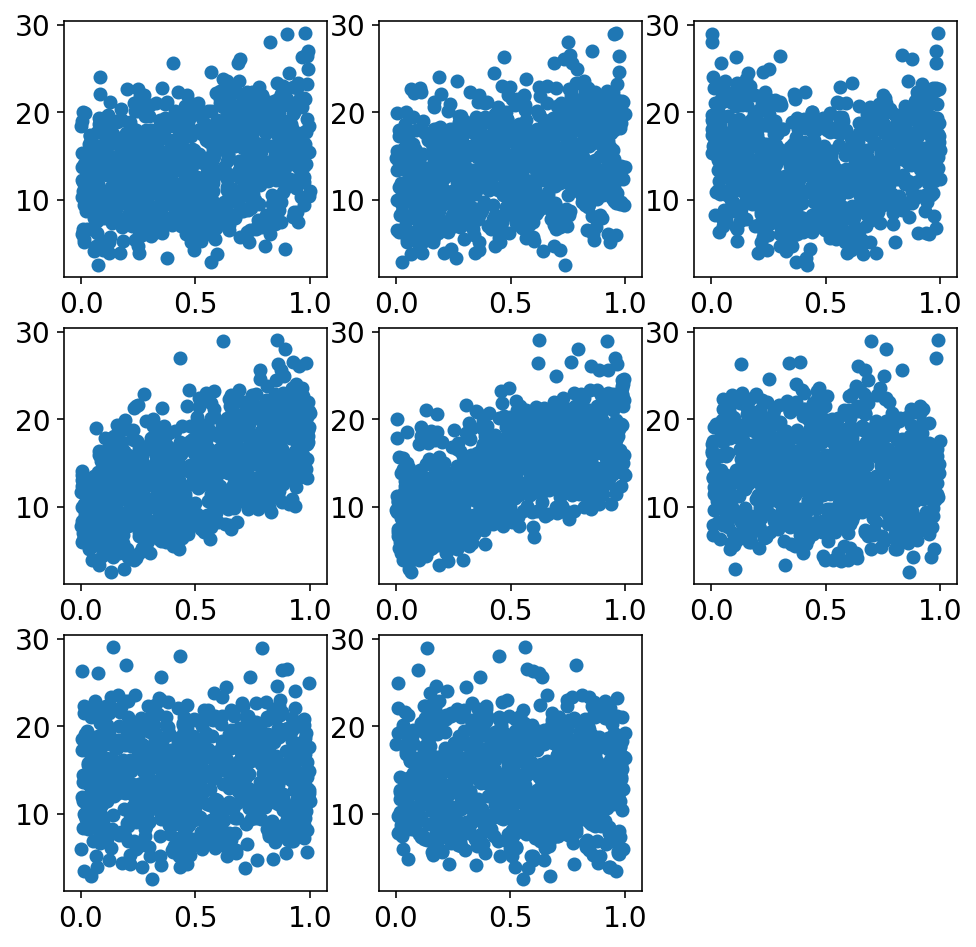

In [264]:
n_feat = 8
for i in range(n_feat):
    plt.subplot(3,3,i+1)
    plt.scatter(X[:,i], y)